## Przygotowanie

Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko.
{nr_albumu}\_{imię}\_{nazwisko}\_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji. 

## Regresja wielomianowa

Regresja liniowa działa dobrze w sytuacji, gdy zmienna, której wartość chemy przewidzieć (zmienna objaśniana/zależna) jest liniowo zależna od zmiennych za pomocą których chcemy ją obliczyć (zmiennych objaśniających/niezależnych). Jak nietrudno się domyślić, takie założenie jest mocno ograniczające i w realnych problemach rzadko będzie ono spełniane. Pojawia się zatem pytanie, co zrobić, gdy wiemy, że dane nie spełniają założenia o liniowej zależności. Istnieje wiele algorytmów rozwiązujących takie problemy. Jednym z nich jest regresja wielomianowa.

Regresja wielomianowa polega na zmianie funkcji regresji tak, aby była to funkcja wielomianowa. Przykładowo, dla jednej zmiennej niezależnej można stworzyć model, którego funkcja regresji będzie wielomianem czwartego stopnia: 

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}

Pozwala to na stworzenie dowolnego kształtu funkcji, który będzie dopasowany do danych. Zwiekszanie krotności wielomianu spowoduje dokładniejsze dopasowanie do danych, jednak rodzi też pewne niebezpieczeństwa. Może okazać się, że taki model będzie zbyt mocno dopasowany do próbek uczących i nie będzie w stanie dokonywać poprawnych predykcji dla nowych, nieznanych próbek. Takie zjawisko nazywa się przeuczeniem modelu i istnieją różne metody do jego rozpoznania i przeciwdziałania. Nie jest to jednak przedmiotem tego notatnika. 

Cały proces trenowania i testowania modelu wygląda jak w przypadku regresji liniowej. Różnica polega jedynie na zmianie funkcji regresji.

Zbiór danych do tego zadania znajduje się w pliku "jaws.csv" i przedstawia zależność długości kości szczękowej jelenia od jego wieku. 

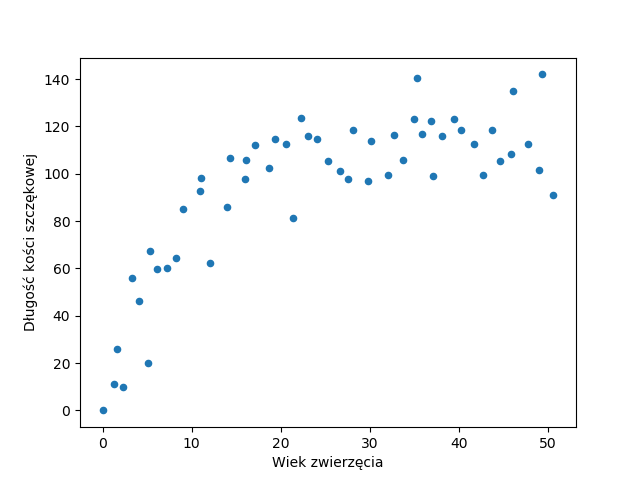

Na powyższym wykresie widać, że zależność na pewno nie jest liniowa. Szczęka zwierzęcia rośnie do pewnego wieku i później jej długość jest stała przez resztę życia. Spróbujemy rozwiązać ten problem za pomocą regresji wielomianowej.


### Zadanie 1
Aby stworzyć funkcję wielomianową konieczne jest dodanie nowych cech do istniejącego zestawu danych.  
Stwórz funkcję, która przetransformuje pojedynczą cechę do wektora cech, w którym kolejne elementy, to kolejne potęgi danej cechy. 

Przykład:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [54]:
import numpy as np

def transform_to_polynomial_feature(x, degree):
    x_arr = np.array(x)
    # jeśli pojedyncza liczba
    if x_arr.ndim == 0:
        return np.array([x_arr**i for i in range(1, degree+1)])
    # zapewniamy kształt (n,)
    x_arr = x_arr.reshape(-1)
    # składamy kolumnowo kolejne potęgi
    return np.column_stack([x_arr**i for i in range(1, degree+1)])


# przykład użycia
print(transform_to_polynomial_feature(3, 5))
# lub na wektorze
xs = np.array([1, 2, 3, 4])
print(transform_to_polynomial_feature(xs, 3))



[  3   9  27  81 243]
[[ 1  1  1]
 [ 2  4  8]
 [ 3  9 27]
 [ 4 16 64]]


### Zadanie 2

Zmodyfikuj swój kod z zadania z regresją liniową tak, aby dla zestawu danych x z jedną zmienną niezależną tworzył nieliniową funkcję regresji. Przetestuj rozwiązanie dla różnych wariantów stopnia wielomianu.
Pamiętaj, że konieczne dodanie dodatkowych cech do oryginalnego zbioru danych, które będą kolejnymi potęgami zmiennej niezależnej - wiek zwierzęcia. 

**UWAGA:** Przed podaniem zestawu danych na wejście modelu pomocna może okazać się operacja normalizacji danych, której celem jest sprowadzenie wartości cech do wspólnych przedziałów wartości. Aby to osiągnąc można wykorzystać [gotowe rozwiązania do standaryzacji lub skalowania min-max](https://scikit-learn.org/stable/modules/preprocessing.html) albo zaimplementować skalowanie samemu korzystając ze [wzoru](https://pl.wikipedia.org/wiki/Standaryzacja_(statystyka)).

In [55]:
import time
import numpy as np
import pandas as pd


def transform_to_polynomial_feature(x: np.ndarray, degree: int) -> np.ndarray:
    """
    Tworzy wielomianowe cechy: [x^1, x^2, ..., x^degree]
    """
    x = np.atleast_1d(x).reshape(-1)
    return np.column_stack([x ** i for i in range(1, degree + 1)])


def learn_and_fit_multi(X: np.ndarray, y: np.ndarray, alpha: float = 0.001, epochs: int = 5000) -> np.ndarray:
    """
    Gradient descent dla regresji liniowej z dowolną liczbą cech.
    Zwraca wektor współczynników [beta0, beta1, ..., beta_n].
    """
    m, n = X.shape
    X_ext = np.hstack([np.ones((m, 1)), X])
    betas = np.zeros(n + 1)
    for _ in range(epochs):
        preds = X_ext.dot(betas)
        grad = (2 / m) * X_ext.T.dot(preds - y)
        betas -= alpha * grad
    return betas


# Wczytanie danych
df = pd.read_csv('jaws.csv')
x = df['age'].values
y = df['bone'].values

# Parametry
degree = 3
alpha = 0.001
epochs = 5000

# Generowanie cech wielomianowych
X_poly = transform_to_polynomial_feature(x, degree)

# Pomiar czasu bez normalizacji
start = time.perf_counter()
_ = learn_and_fit_multi(X_poly, y, alpha=alpha, epochs=epochs)
time_no_norm = time.perf_counter() - start

# Ręczna normalizacja (standaryzacja)
means = X_poly.mean(axis=0)
stds = X_poly.std(axis=0)
X_scaled = (X_poly - means) / stds




### Zadanie 3

Porównaj czasy działania algorytmu dla danych przed i po normalizacji

In [56]:
# Pomiar czasu z normalizacją
start = time.perf_counter()
_ = learn_and_fit_multi(X_scaled, y, alpha=alpha, epochs=epochs)
time_norm = time.perf_counter() - start

# Wyniki
print(f"Czas bez normalizacji: {time_no_norm:.6f} s")
print(f"Czas z normalizacją:   {time_norm:.6f} s")

Czas bez normalizacji: 0.045322 s
Czas z normalizacją:   0.059515 s


### Zadanie 4

Stwórz wykres na którym będą znajdować się dane ze zbioru _jaws.csv_ oraz funkcje regresji wielomianowej dla wielomianu pierwszego, czwartego i piątego stopnia. 

Opisz wykres. Jak zmienia się funkcja regresji wraz z dodawaniem kolejnych stopni wielomianu? Czy widzisz jakąś inną możliwą transformację funkcji regresji tak, żeby rozwiązała analizowany problem?

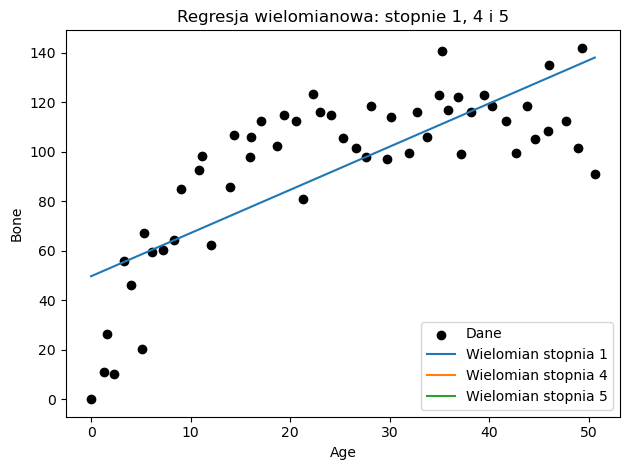

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ————— Rysowanie wykresu —————
plt.figure()
plt.scatter(x, y, color='black', label='Dane')

# przygotowanie gęstego wektora x do rysowania krzywych
x_lin = np.linspace(x.min(), x.max(), 200)

for degree in (1, 4, 5):
    # 1) przekształcenie oryginalnych x do cech wielomianowych
    X_poly = transform_to_polynomial_feature(x, degree)
    # 2) uczenie modelu
    betas = learn_and_fit_multi(X_poly, y, alpha=0.001, epochs=5000)
    # 3) obliczenie predykcji na x_lin
    X_lin = transform_to_polynomial_feature(x_lin, degree)
    y_pred = np.hstack([np.ones((len(x_lin), 1)), X_lin]).dot(betas)
    # 4) narysowanie
    plt.plot(x_lin, y_pred, label=f'Wielomian stopnia {degree}')

plt.xlabel('Age')
plt.ylabel('Bone')
plt.title('Regresja wielomianowa: stopnie 1, 4 i 5')
plt.legend()
plt.tight_layout()
plt.show()


### Zadanie 5

Odszukaj dowolny inny zbiór danych, dokonaj jego wizualizacji i przetestuj działania algorytmu

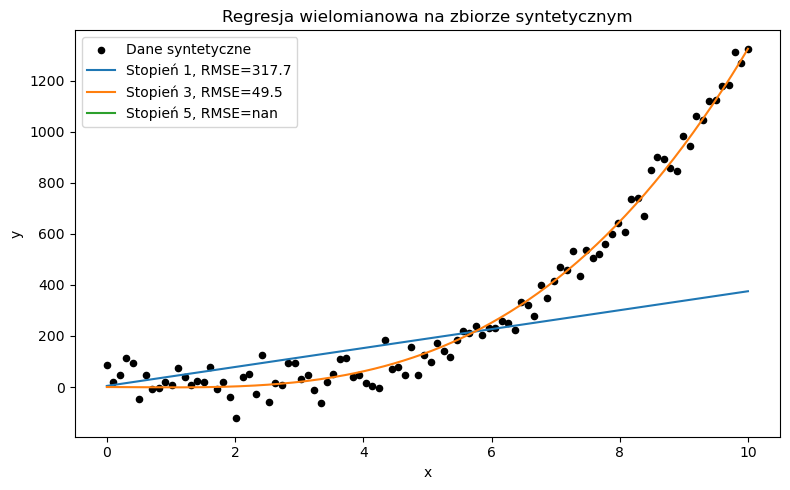

Degree 1: time=0.1003s, RMSE=317.74, betas=[ 4.2322718  37.11367126]
Degree 3: time=0.1040s, RMSE=49.48, betas=[-0.03689914 -0.60322835 -2.2243207   1.55412239]
Degree 5: time=0.1261s, RMSE=nan, betas=[nan nan nan nan nan nan]


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 1) Generowanie syntetycznego zbioru danych
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 1.5 * x ** 3 - 2.0 * x ** 2 + 0.5 * x + np.random.normal(0, 50, size=x.shape)


# 2) Funkcja do tworzenia cech wielomianowych
def transform_to_polynomial_feature(x, degree):
    x = np.atleast_1d(x).reshape(-1)
    return np.column_stack([x ** i for i in range(1, degree + 1)])


# 3) Implementacja gradient descent
def learn_and_fit_multi(X, y, alpha=1e-6, epochs=10000):
    m, n = X.shape
    X_ext = np.hstack([np.ones((m, 1)), X])
    betas = np.zeros(n + 1)
    for _ in range(epochs):
        preds = X_ext.dot(betas)
        grad = (2 / m) * X_ext.T.dot(preds - y)
        betas -= alpha * grad
    return betas


# 4) Testujemy dla stopni 1, 3, 5
degrees = [1, 3, 5]
results = {}

for deg in degrees:
    X_poly = transform_to_polynomial_feature(x, deg)
    start = time.perf_counter()
    betas = learn_and_fit_multi(X_poly, y, alpha=1e-6, epochs=10000)
    elapsed = time.perf_counter() - start
    # obliczenie RMSE
    preds = np.hstack([np.ones((len(x), 1)), X_poly]).dot(betas)
    rmse = np.sqrt(np.mean((preds - y) ** 2))
    results[deg] = (betas, elapsed, rmse)

# 5) Wizualizacja
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='black', s=20, label='Dane syntetyczne')
x_lin = np.linspace(0, 10, 200)
for deg, (betas, _, rmse) in results.items():
    X_lin = transform_to_polynomial_feature(x_lin, deg)
    y_lin = np.hstack([np.ones((len(x_lin), 1)), X_lin]).dot(betas)
    plt.plot(x_lin, y_lin, label=f'Stopień {deg}, RMSE={rmse:.1f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresja wielomianowa na zbiorze syntetycznym')
plt.legend()
plt.tight_layout()
plt.show()

# 6) Wyniki
for deg, (betas, elapsed, rmse) in results.items():
    print(f"Degree {deg}: time={elapsed:.4f}s, RMSE={rmse:.2f}, betas={betas}")


### Zadanie 6

Zaproponuj metrykę oceny skuteczności działania algorytmu. Można wzorować się na metodach dostępnych pod odnośnikiem: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [59]:
import numpy as np

def root_mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Metryka 1: RMSE – pierwiastek ze średniego błędu kwadratowego.
    """
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Metryka 2: współczynnik determinacji R².
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

# Przykład użycia:
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5,  0.0, 2.0, 8.0])
print("RMSE:", root_mean_squared_error(y_true, y_pred))
print("R2:  ", r2_score(y_true, y_pred))


RMSE: 0.6123724356957945
R2:   0.9486081370449679
